#### 1. Implement logistic regression using Python/R to perform classification on Social_Network_Ads.csv dataset. 2. Compute Confusion matrix to find TP, FP, TN, FN, Accuracy, Error rate, Precision, Recall on the given dataset

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
df=pd.read_csv('Social_Network_Ads.csv')
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0
...,...,...,...,...,...
395,15691863,Female,46.0,41000.0,1
396,15706071,Male,51.0,23000.0,1
397,15654296,Female,50.0,20000.0,1
398,15755018,Male,36.0,33000.0,0


In [4]:
X = df.iloc[:, [2, 3]].values  # Age and Estimated Salary Columns
y = df.iloc[:, 4].values       # Purchased Column


In [6]:
# Splitting Dataset into Training and Testing Sets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [8]:
# Feature Scaling

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [9]:
# Fitting Logistic Regression Model

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [10]:
# Prediction
y_pred = model.predict(X_test)

In [11]:
# Confusion Matrix

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", cm)



Confusion Matrix:
 [[65  3]
 [ 8 24]]


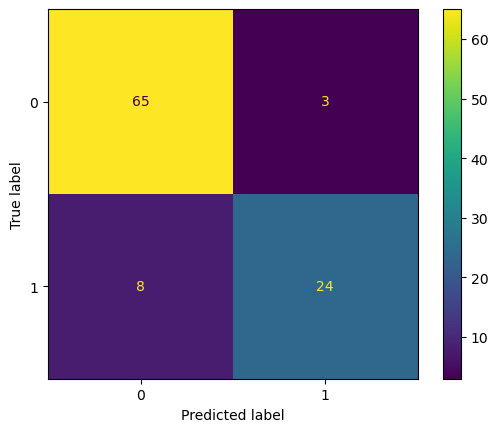

In [12]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

In [13]:
# Calculating TP, TN, FP, FN
TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]


##Final Summary
Metric	Code	Meaning
TP	cm[1, 1]	Correct Positive Predictions
TN	cm[0, 0]	Correct Negative Predictions
FP	cm[0, 1]	Wrong Positive Predictions
FN	cm[1, 0]	Wrong Negative Predictions

📌 Formulas Used:
Metric	Formula	Meaning
Accuracy	(TP + TN) / (TP + TN + FP + FN)	Total Correct Predictions
Error Rate	(FP + FN) / (TP + TN + FP + FN)	Total Incorrect Predictions
Precision	TP / (TP + FP)	How many selected items are relevant
Recall	TP / (TP + FN)	How many relevant items are selected


In [14]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
error_rate = 1 - accuracy
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)


In [15]:
# Results
print("\nTrue Positive (TP):", TP)
print("True Negative (TN):", TN)
print("False Positive (FP):", FP)
print("False Negative (FN):", FN)
print("Accuracy:", accuracy)
print("Error Rate:", error_rate)
print("Precision:", precision)
print("Recall:", recall)


True Positive (TP): 24
True Negative (TN): 65
False Positive (FP): 3
False Negative (FN): 8
Accuracy: 0.89
Error Rate: 0.10999999999999999
Precision: 0.8888888888888888
Recall: 0.75
